# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Dataset

In [38]:
df = sns.load_dataset("penguins")

# Exploratory Data Analysis

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [6]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [39]:
# remove nans
df.dropna(inplace = True)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

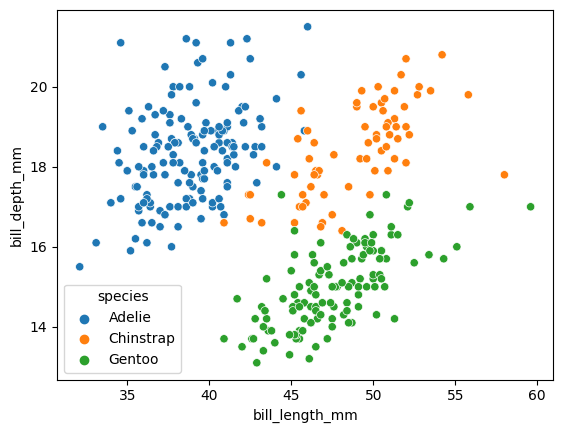

In [8]:
sns.scatterplot(x=df['bill_length_mm'], y=df['bill_depth_mm'], hue = df['species'])

In [28]:
df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

# Preprocessing

In [40]:
from sklearn.preprocessing import StandardScaler

# Scale numerical values
scaler = StandardScaler()
df[['bill_length_mm','bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'body_mass_g']] = scaler.fit_transform(df[['bill_length_mm','bill_depth_mm', 'body_mass_g', 'flipper_length_mm', 'body_mass_g']])

In [41]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', drop='if_binary')
enc_df = pd.DataFrame(enc.fit_transform(df[['sex', 'island']]).toarray())
enc_df.columns = enc.get_feature_names_out(['sex', 'island'])

In [42]:
df = pd.concat(
    [
        df.reset_index().drop(['sex', 'island'], axis='columns'),
        enc_df
    ],
    axis = 1
).drop(['index'], axis='columns')

In [43]:
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Male,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,-0.896042,0.780732,-1.426752,-0.568475,1.0,0.0,0.0,1.0
1,Adelie,-0.822788,0.119584,-1.069474,-0.506286,0.0,0.0,0.0,1.0
2,Adelie,-0.676280,0.424729,-0.426373,-1.190361,0.0,0.0,0.0,1.0
3,Adelie,-1.335566,1.085877,-0.569284,-0.941606,0.0,0.0,0.0,1.0
4,Adelie,-0.859415,1.747026,-0.783651,-0.692852,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
328,Gentoo,0.587352,-1.762145,0.931283,0.892957,0.0,1.0,0.0,0.0
329,Gentoo,0.514098,-1.457000,1.002739,0.799674,0.0,1.0,0.0,0.0
330,Gentoo,1.173384,-0.744994,1.502928,1.919069,1.0,1.0,0.0,0.0
331,Gentoo,0.221082,-1.202712,0.788372,1.234995,0.0,1.0,0.0,0.0


# Model

## Metrics

In [44]:
from sklearn import metrics

# Define metrics to evaluate clusters

def purity(y_true, y_pred):
    cm = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=0)) / np.sum(cm)

def inverse_purity(y_true, y_pred):
    cm = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(cm, axis=1)) / np.sum(cm)

def harmonic_mean(y_true, y_pred):
    return 2*purity(y_true, y_pred)*inverse_purity(y_true, y_pred) /(purity(y_true, y_pred)+inverse_purity(y_true, y_pred))

In [49]:
X = df.drop(['species'], axis='columns')
y_true = df['species']

## K Means

In [50]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

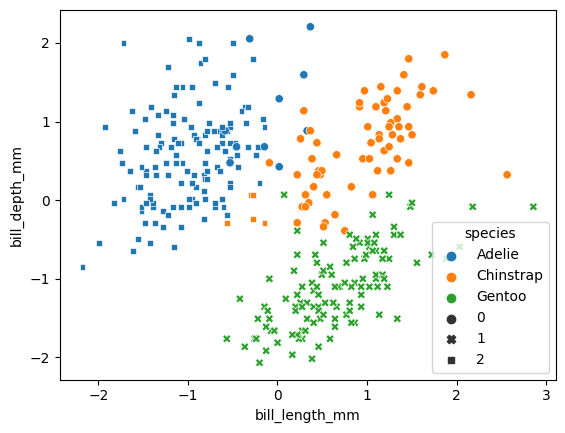

In [51]:
# Visualization
sns.scatterplot(x=df['bill_length_mm'], y=df['bill_depth_mm'], hue = y_true, style = y_pred )

In [52]:
# cross tab
matrix = pd.DataFrame({'labels': y_pred, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0            10         63       0
1             0          0     119
2           136          5       0


In [53]:
# Metrics
print("Purity: ", purity(y_true, y_pred))
print("Inverse purity: ", inverse_purity(y_true, y_pred))
print("Harmonic mean: ", harmonic_mean(y_true, y_pred))

Purity:  0.954954954954955
Inverse purity:  0.954954954954955
Harmonic mean:  0.954954954954955


### Find the optimal K

In [95]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10
ks = []

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  ks.append(k)
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

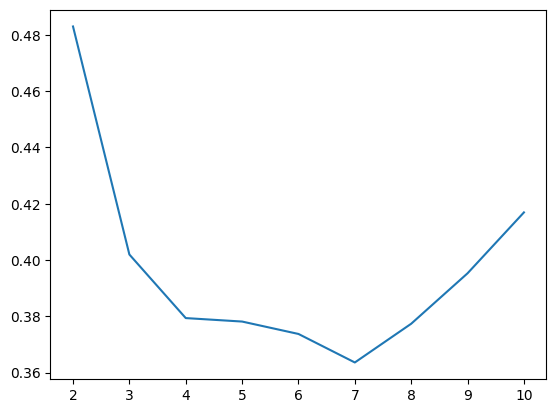

In [97]:
sns.lineplot(x=ks, y=sil)

2 is the optimal K according to the Silhoutte score.

In [98]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
y_pred = model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

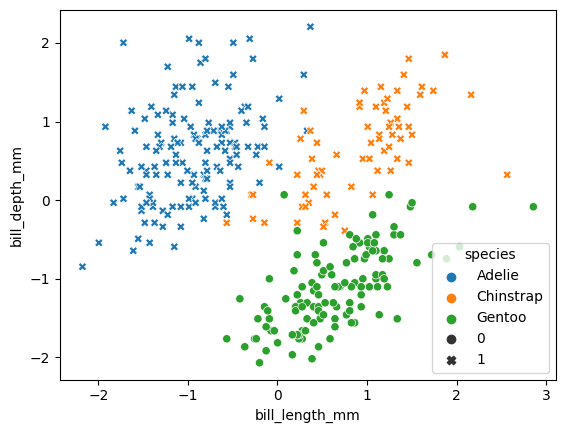

In [99]:
# Visualization
sns.scatterplot(x=df['bill_length_mm'], y=df['bill_depth_mm'], hue = y_true, style = y_pred )

In [100]:
# cross tab
matrix = pd.DataFrame({'labels': y_pred, 'species': y_true })
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0             0          0     119
1           146         68       0


In [101]:
# Metrics
print("Purity: ", purity(y_true, y_pred))
print("Inverse purity: ", inverse_purity(y_true, y_pred))
print("Harmonic mean: ", harmonic_mean(y_true, y_pred))

Purity:  0.7957957957957958
Inverse purity:  1.0
Harmonic mean:  0.8862876254180602


Using KMeans with the optimal value of K, we get 2 clusters where species Adelie and Chinstrap are grouped together.

## DBSCAN

In [91]:
from sklearn.cluster import DBSCAN

model =  DBSCAN(eps=0.4, min_samples=6)
y_pred = model.fit_predict(X)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

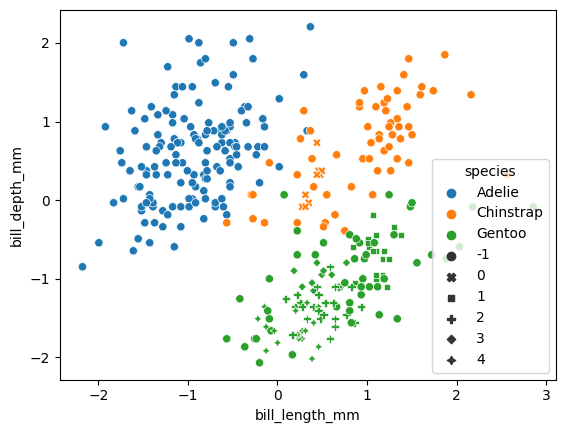

In [92]:
# Visualization
sns.scatterplot(x=df['bill_length_mm'], y=df['bill_depth_mm'], hue = y_true, style = y_pred )